## Линейная модель

Линейная модель - это математическая модель, используемая в машинном обучении для предсказания значений на основе линейной комбинации входных признаков. Она предполагает, что выходное значение (прогноз) можно выразить как взвешенную сумму входных признаков с добавлением смещения (bias). Математически это можно записать следующим образом:


$\hat{y} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$

где:
- $\hat{y}$ - прогнозируемое значение,
- $w_1, w_2, \ldots, w_n$ - веса (параметры) модели для каждого признака,
- $x_1, x_2, \ldots, x_n$ - входные признаки,
- $b$ - смещение (bias).

### Вычисление выхода линейной модели

Для вычисления выхода линейной модели, просто подставьте значения признаков в уравнение, используя соответствующие веса и смещение. Матричная формула для вычисления выхода линейной модели для набора данных \(X\) выглядит следующим образом:

$\hat{Y} = X \cdot \mathbf{w} + b$

где:
- $\hat{Y}$ - вектор прогнозов для всего набора данных,
- $X$ - матрица признаков, где каждая строка представляет один образец, а столбцы - признаки,
- $\mathbf{w}$ - вектор весов модели,
- $b$ - смещение (bias).

### Обучение линейной модели

Обучение линейной модели заключается в настройке параметров (весов и смещения) так, чтобы они наилучшим образом соответствовали обучающим данным. Одним из наиболее распространенных методов обучения линейной модели является градиентный спуск.

### Градиентный спуск

Градиентный спуск - это метод оптимизации, используемый для обновления параметров модели с целью минимизации функции потерь. Функция потерь оценивает, насколько хорошо модель предсказывает реальные значения на обучающих данных.

Для линейной регрессии, часто используется среднеквадратичная ошибка (Mean Squared Error - MSE) в качестве функции потерь:

$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - реальное значение для i-го примера,
- $\hat{y}_i$ - прогнозированное значение для i-го примера.

### Корректировка весов модели

Для обновления весов модели в методе градиентного спуска, используется градиент функции потерь по отношению к параметрам модели. Градиент показывает направление наибольшего увеличения функции потерь, поэтому мы двигаемся в противоположном направлении градиента, чтобы уменьшить потери. Формула для обновления весов выглядит следующим образом:

$\mathbf{w}_{\text{новые}} = \mathbf{w}_{\text{старые}} - \text{learning_rate} \cdot \nabla L$

где:
- $\mathbf{w}_{\text{новые}}$ - новые веса после обновления,
- $\mathbf{w}_{\text{старые}}$ - текущие веса,
- $\text{learning_rate}$ - скорость обучения (коэффициент, контролирующий размер шага градиентного спуска),
- $\nabla L$ - градиент функции потерь по параметрам модели.

Этот процесс повторяется до достижения сходимости или определенного числа итераций.

## Классификатор на линейной модели

На линейной модели можно построить и классификатор. Для этого нужно выход линейной модели отбразить в интервал от 0 до 1. В этом нам поможет логистическая функция:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Для обучения скорректируем функцию потерь. Нетрудно показать, что функция, называемая кросс-энтропией на самом деле соответствует максимизации правдоподобия (кстати, почитайте про правдоподобие), ниже представлено выражение для нее

$BCE = -\frac{1}{N} \sum_{i=1}^{N} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - истинная метка класса (0 или 1) для i-го примера,
- $\hat{y}_i$ - вероятность принадлежности к классу 1 для i-го примера (выход сигмоидной функции).

Будем считать, что модель относит объект к 1 классу, если ее выход $>=0.5$, иначе - 0 класс.

## Как считать градиенты

Приведу градиент для кросс-энтропии:

$\nabla_{\mathbf{w}} \text{BCE} = -\frac{1}{N} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$

Для MSE вычислить градиент самостоятельно

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Базовая линейная модель
class LinearModel:
    def __init__(self, num_features):
        # Инициализация весов и смещения
        self.num_features = num_features
        self.weights = np.zeros(num_features)  # Веса для каждого признака
        self.bias = 0  # Смещение (bias)

    def __call__(self, X):
        # Линейная комбинация входных данных и весов
        return np.dot(X, self.weights) + self.bias


# Линейная регрессия с использованием градиентного спуска
class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        # Инициализация списка для хранения ошибок на каждой эпохе
        error_history = []
        for _ in range(epochs):
            predictions = self.__call__(X)  # Предсказание на основе текущих весов
            error = y - predictions  # Ошибка между предсказанием и реальными значениями
            gradient = -2 * np.dot(X.T, error) / X.shape[0]  # Вычисление градиента
            self.weights -= learning_rate * gradient  # Обновление весов
            self.bias -= learning_rate * np.mean(error)  # Обновление смещения
            current_error = ((y - predictions) ** 2).sum()  # Вычисление текущей ошибки (MSE)
            error_history.append(current_error)  # Сохранение ошибки в истории
        return error_history

    def predict(self, X):
        # Предсказание значений для новых данных
        return self.__call__(X)


# Линейный классификатор с использованием логистической регрессии
class LinearClassifier(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        # Инициализация списка для хранения ошибок на каждой эпохе
        error_history = []
        for _ in range(epochs):
            predictions = self.__call__(X)  # Предсказание на основе текущих весов
            sigmoid = 1 / (1 + np.exp(-predictions))  # Применение сигмоидной функции
            error = y - sigmoid  # Ошибка между предсказанием и реальными значениями
            gradient = -np.dot(X.T, error) / X.shape[0]  # Вычисление градиента
            self.weights -= learning_rate * gradient  # Обновление весов
            self.bias -= learning_rate * np.mean(error)  # Обновление смещения
            current_error = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))  # Текущая ошибка (BCE)
            error_history.append(current_error)  # Сохранение ошибки в истории
        return error_history

    def predict(self, X):
        predictions = self.__call__(X)
        sigmoid = 1 / (1 + np.exp(-predictions))  # Применение сигмоидной функции
        return np.round(sigmoid)  # Округление для получения метки класса

    def predict_proba(self, X):
        predictions = self.__call__(X)
        sigmoid = 1 / (1 + np.exp(-predictions))  # Вычисление вероятностей
        return sigmoid  # Возвращение вероятностей класса


## Проверьте модели на данных

### Линейная модель

#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable:

- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [4]:
import pandas as pd

In [5]:
# Загрузка данных из CSV-файла
data = pd.read_csv('Student_Performance.csv')
print(data.head())  # Вывод первых строк для просмотра данных

# Целевая переменная (Performance Index)
Y = data['Performance Index']

# Независимые переменные (признаки)
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]

# Замена значений категориального признака "Extracurricular Activities" на числовые (1 для "Yes", 0 для "No")
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

# Преобразование признаков в формат numpy для дальнейшей обработки
X = X.to_numpy()


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


C:\Users\Huawei\AppData\Local\Temp\ipykernel_7740\3792866436.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
C:\Users\Huawei\AppData\Local\Temp\ipykernel_7740\3792866436.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [6]:
# Вычислите среднее значение по столбцам (признакам)
mean = np.mean(X, axis=0)  # Среднее по каждому столбцу

# Вычислите стандартное отклонение по столбцам
std = np.std(X, axis=0)  # Стандартное отклонение по каждому столбцу

# Нормализуйте данные по столбцам (стандартное масштабирование)
normalized_X = (X - mean) / std  # Применение стандартного масштабирования

# Нормализуйте и выходные данные
normalized_Y = (Y - np.mean(Y)) / np.std(Y)  # Стандартное масштабирование для Y


In [8]:
# Создаем экземпляр линейного регрессора, указывая количество признаков
lr = LinearRegressor(num_features=X.shape[1])  # Количество признаков равно количеству столбцов в X

# Обучаем модель на нормализованных данных и сохраняем историю ошибок
history = lr.fit(normalized_X, normalized_Y)  # Обучение с использованием нормализованных X и Y

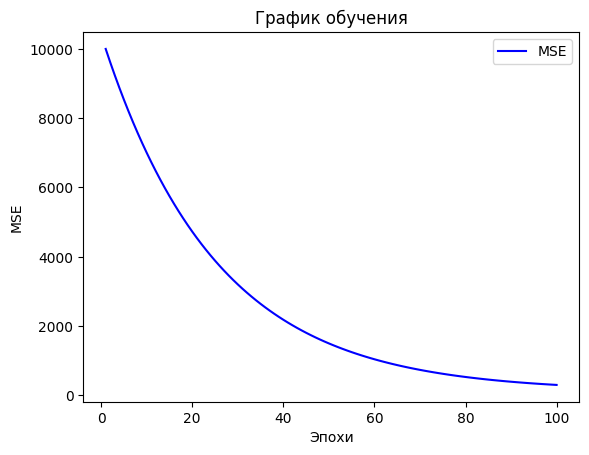

In [9]:
# Создаем последовательность эпох для оси X
epochs = range(1, len(history) + 1)

# Постройте график обучения, отображающий изменение ошибки MSE по эпохам
plt.plot(epochs, history, 'b', label='MSE')  # График изменения ошибки MSE
plt.title('График обучения')  # Заголовок графика
plt.xlabel('Эпохи')  # Метка оси X
plt.ylabel('MSE')  # Метка оси Y
plt.legend()  # Отображение легенды

# Отобразите график
plt.show()

### Классификатор
#### Context
When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

Account Balance: No account (1), None (No balance) (2), Some Balance (3)

Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

No of Credits at this bank: 1, More than 1

Guarantor: None, Yes

Concurrent Credits: Other Banks or Dept Stores, None

ForeignWorker variable may be dropped from the study

Purpose of Credit: New car, Used car, Home Related, Other

In [10]:
# Загрузка данных из файла с указанием разделителя
data = pd.read_csv('german.csv', sep=';')
print(data.head())  # Отображение первых строк данных для предварительного просмотра

# Целевая переменная (Creditability)
Y = data['Creditability']  # Определение целевой переменной

# Признаки (предикторы), влияющие на кредитоспособность
X = data[['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Value_Savings_Stocks', 
          'Length_of_current_employment', 'Sex_Marital_Status', 'No_of_Credits_at_this_Bank', 
          'Guarantors', 'Concurrent_Credits', 'Purpose']]  # Определение признаков

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

In [11]:
print(data.describe())

       Creditability  Account_Balance  Duration_of_Credit_monthly  \
count    1000.000000      1000.000000                 1000.000000   
mean        0.700000         2.577000                   20.903000   
std         0.458487         1.257638                   12.058814   
min         0.000000         1.000000                    4.000000   
25%         0.000000         1.000000                   12.000000   
50%         1.000000         2.000000                   18.000000   
75%         1.000000         4.000000                   24.000000   
max         1.000000         4.000000                   72.000000   

       Payment_Status_of_Previous_Credit      Purpose  Credit_Amount  \
count                         1000.00000  1000.000000     1000.00000   
mean                             2.54500     2.828000     3271.24800   
std                              1.08312     2.744439     2822.75176   
min                              0.00000     0.000000      250.00000   
25%               

In [12]:
# Вычислите среднее значение по столбцам (признакам)
mean = X.mean(axis=0)  # Среднее по каждому столбцу признаков

# Вычислите стандартное отклонение по столбцам
std = X.std(axis=0)  # Стандартное отклонение по каждому столбцу признаков

# Нормализуйте данные по столбцам (стандартное масштабирование)
normalized_X = (X - mean) / std  # Применение стандартного масштабирования

In [13]:
# Создаем экземпляр линейного классификатора, указывая количество признаков
lc = LinearClassifier(num_features=X.shape[1])  # Количество признаков равно количеству столбцов в X

# Обучаем модель на нормализованных данных и сохраняем историю ошибок
history = lc.fit(normalized_X, Y)  # Обучение с использованием нормализованных X и целевой переменной Y

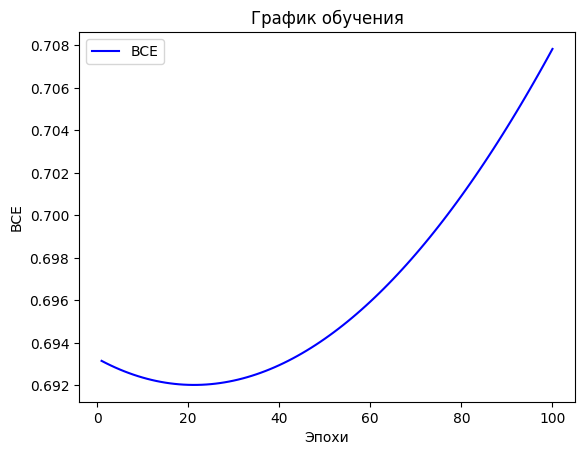

In [15]:
# Создаем последовательность эпох для оси X
epochs = range(1, len(history) + 1)

# Постройте график обучения, отображающий изменение ошибки BCE по эпохам
plt.plot(epochs, history, 'b', label='BCE')  # График изменения ошибки BCE
plt.title('График обучения')  # Заголовок графика
plt.xlabel('Эпохи')  # Метка оси X
plt.ylabel('BCE')  # Метка оси Y
plt.legend()  # Отображение легенды

# Отобразите график
plt.show()

In [16]:
# Предсказание классов для нормализованных данных
pred = lc.predict(normalized_X)  # Используем обученную модель для предсказания классов

# Вычисление точности (accuracy) путем сравнения предсказанных и реальных значений
print('accuracy: ', (pred == Y).sum() / len(Y))  # Доля правильных предсказаний

accuracy:  0.455


Вычислите для этой модели ROC-AUC, precision, recall и f1

In [17]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Предсказание вероятностей классов
pred_proba = lc.predict_proba(normalized_X)  # Вероятности, предсказанные моделью

# Вычисление ROC-AUC
roc_auc = roc_auc_score(Y, pred_proba)
print('ROC-AUC:', roc_auc)

# Предсказание классов для вычисления других метрик
pred = lc.predict(normalized_X)

# Вычисление precision (точности)
precision = precision_score(Y, pred)
print('Precision:', precision)

# Вычисление recall (полноты)
recall = recall_score(Y, pred)
print('Recall:', recall)

# Вычисление F1
f1 = f1_score(Y, pred)
print('F1 Score:', f1)

ROC-AUC: 0.7622023809523809
Precision: 0.9234972677595629
Recall: 0.24142857142857144
F1 Score: 0.3827859569648924


In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Function to plot the loss curve
def plot_loss_curve(loss_history, label):
    plt.plot(range(1, len(loss_history) + 1), loss_history, label=label)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Curve during Gradient Descent')
    plt.legend()
    plt.show()

# Function to plot the feature coefficients
def plot_feature_coefficients(weights, features, label):
    plt.barh(features, weights, color='lightblue')
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Coefficients: {label}')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, label):
    plt.plot(fpr, tpr, color='blue', label=f'{label} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {label}')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(precision, recall, label):
    plt.plot(recall, precision, color='green', label=f'{label}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {label}')
    plt.legend()
    plt.show()
